# Getting started with NN


In [3]:
!pip install tensorflow

!pip install keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,))) # Input 784 Output 32
model.add(layers.Dense(32)) # Don't need to specify the input layer, keras do that



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=74c813c933077a890bda210066eadac970be85cb3d51f63e0e9d3cf30fceae57
  Stored in directory: c:\users\francisco duran\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=006556c397c0e86a140d692daf66e1bc1b1ed102ec9c348e39b5c7f1f390646a
  Stored in directory: c:\users\francisco duran\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Unins

In [4]:
# Using Sequential
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# Same code of above, but with API
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

In [7]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='mse',
metrics=['accuracy'])

In [9]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [15]:
len(train_data[0])

218

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
len(x_train[0])


10000

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train[0]

1.0

In [19]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [21]:
# Validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [22]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 17s 55ms/step - loss: 0.5817 - acc: 0.7099 - val_loss: 0.3916 - val_acc: 0.8546
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3106 - acc: 0.9037 - val_loss: 0.3171 - val_acc: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2217 - acc: 0.9294 - val_loss: 0.2767 - val_acc: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1654 - acc: 0.9497 - val_loss: 0.2750 - val_acc: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1385 - acc: 0.9577 - val_loss: 0.3101 - val_acc: 0.8776
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1129 - acc: 0.9668 - val_loss: 0.2949 - val_acc: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0940 - acc: 0.9734 - val_loss: 0.3114 - val_acc: 0.8854
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0777 - 

In [24]:
type(history)

keras.callbacks.History

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

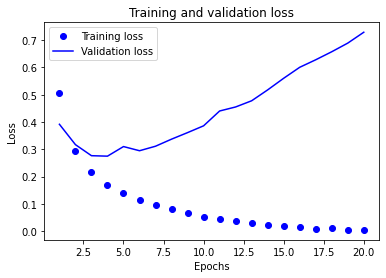

In [27]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

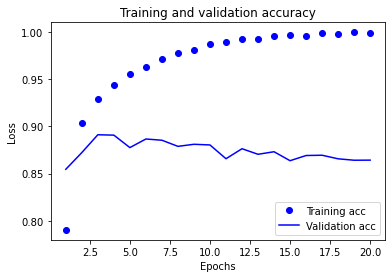

In [29]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,history_dict['acc'] , 'bo', label='Training acc')
plt.plot(epochs,history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# As the model is overfitted
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 14ms/step - loss: 0.5538 - accuracy: 0.7414
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2737 - accuracy: 0.9072
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1967 - accuracy: 0.9337
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2893 - accuracy: 0.8856


In [31]:
results # accuracy 0.88

[0.2892732620239258, 0.8855599761009216]

In [32]:
model.predict(x_test) # As you can see, the network is confident for some samples (0.99 or more, or 0.01 or 
#less) but less confident for others (0.6, 0.4).

array([[0.2066823 ],
       [0.9993759 ],
       [0.80032647],
       ...,
       [0.11549011],
       [0.07857475],
       [0.517966  ]], dtype=float32)

# single-label, multiclass classification.
## 46 classes

In [34]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [36]:
print(len(train_data))
print(len(test_data))

8982
2246


In [37]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [38]:
# decode
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

565248/550378 [==============================] - 1s 1us/step


In [39]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [40]:
train_labels[100]

20

In [41]:
# One-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [43]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [44]:
# same
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [45]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # from 16 dimensional space to a 64 prevent bottlenecks
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [46]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [47]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [48]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 62ms/step - loss: 3.2656 - accuracy: 0.3649 - val_loss: 1.8750 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.6036 - accuracy: 0.6937 - val_loss: 1.3532 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 1.1356 - accuracy: 0.7617 - val_loss: 1.1595 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 27ms/step - loss: 0.8770 - accuracy: 0.8185 - val_loss: 1.0636 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 31ms/step - loss: 0.6805 - accuracy: 0.8564 - val_loss: 0.9983 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 27ms/step - loss: 0.5686 - accuracy: 0.8851 - val_loss: 0.9607 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.4623 - accuracy: 0.9069 - val_loss: 0.9210 - val_accuracy: 0.8160
Epoch 8/20
16

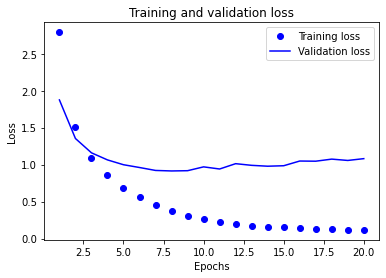

In [49]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

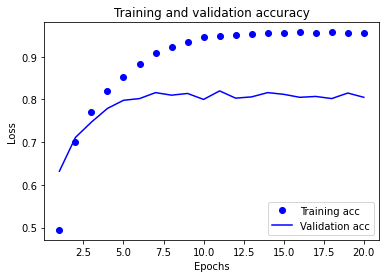

In [53]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
"""
The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set."""
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 62ms/step - loss: 3.0807 - accuracy: 0.4250 - val_loss: 1.7285 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 0s 27ms/step - loss: 1.5127 - accuracy: 0.6845 - val_loss: 1.3058 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 0s 27ms/step - loss: 1.1061 - accuracy: 0.7647 - val_loss: 1.1307 - val_accuracy: 0.7600
Epoch 4/9
16/16 [==============================] - 0s 30ms/step - loss: 0.8542 - accuracy: 0.8178 - val_loss: 1.0441 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 0s 27ms/step - loss: 0.6980 - accuracy: 0.8556 - val_loss: 0.9651 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 0s 29ms/step - loss: 0.5511 - accuracy: 0.8851 - val_loss: 0.9275 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 28ms/step - loss: 0.4327 - accuracy: 0.9098 - val_loss: 0.8977 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [55]:
results

[0.9775278568267822, 0.7867319583892822]

In [57]:
predictions = model.predict(x_test)
predictions

array([[1.23358477e-04, 1.31058943e-04, 5.03941301e-05, ...,
        1.27513085e-05, 4.37188191e-06, 4.47005550e-06],
       [4.94345557e-03, 3.51423174e-01, 1.37248402e-02, ...,
        1.21212768e-04, 4.42201817e-05, 5.23952651e-04],
       [2.42857430e-02, 7.51680493e-01, 5.18513098e-03, ...,
        3.61693208e-03, 5.42388530e-04, 4.49854007e-04],
       ...,
       [8.86440976e-05, 2.69454380e-04, 1.13400769e-04, ...,
        7.40696760e-06, 5.35151821e-06, 5.10706832e-06],
       [4.06527007e-03, 3.64936925e-02, 8.74381885e-03, ...,
        3.23580083e-04, 8.37982807e-05, 1.08208107e-04],
       [5.37024625e-03, 5.92491984e-01, 1.16720498e-02, ...,
        2.69565295e-04, 3.11618496e-04, 2.71641446e-04]], dtype=float32)

In [58]:
predictions[0].shape

(46,)

In [59]:
np.sum(predictions[0])

1.0

In [60]:
np.argmax(predictions[0])

3

In [61]:
# If you change number of intermediate layers
"""
The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.
"""

'\nThe network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop\nis mostly due to the fact that you’re trying to compress a lot of information (enough\ninformation to recover the separation hyperplanes of 46 classes) into an intermediate\nspace that is too low-dimensional. The network is able to cram most of the necessary\ninformation into these eight-dimensional representations, but not all of it.\n'